In [3]:
import os
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go


patientDf = pd.read_csv('full_patient_data.csv')
controlDf = pd.read_csv('full_control_data.csv')


pDf1002 = patientDf[patientDf['LabelValue'] == 1002]
cDf1002 = controlDf[controlDf['LabelValue'] == 1002]



In [4]:
# px.histogram(df_1002, x='Volume', y='LabelValue')
fig1 = px.histogram(pDf1002, x='Volume', y='LabelValue', title='1002 Patients Volume')
fig1.show()

In [5]:
fig2 = px.histogram(cDf1002, x='Volume', y='LabelValue', title='1002 Control Volume')
fig2.show()

In [6]:
pDf1002['Type'] = 'Patient'
pDf1002.head()

,Unnamed: 0,LabelValue,Volume,Patient,Type
0,1,1002.0,471.25,3571P,Patient
62,1,1002.0,360.00,4698P,Patient
124,1,1002.0,926.25,4701P,Patient
186,1,1002.0,528.75,4708P,Patient
248,1,1002.0,413.75,4710P,Patient


In [7]:
cDf1002['Type'] = 'Control'
cDf1002.head()

,Unnamed: 0,LabelValue,Volume,Control,Type
0,1,1002.0,521.25,3011S,Control
62,1,1002.0,511.25,3575S,Control
124,1,1002.0,427.50,4692S,Control
186,1,1002.0,446.25,4699S,Control
247,1,1002.0,350.00,4716S,Control


In [8]:
combinedDf = pd.concat([cDf1002, pDf1002])
combinedDf.head()

,Unnamed: 0,LabelValue,Volume,Control,Type,Patient
0,1,1002.0,521.25,3011S,Control,NaN
62,1,1002.0,511.25,3575S,Control,NaN
124,1,1002.0,427.50,4692S,Control,NaN
186,1,1002.0,446.25,4699S,Control,NaN
247,1,1002.0,350.00,4716S,Control,NaN


In [9]:
px.histogram(combinedDf, x='Volume', color='Type', barmode='overlay', nbins=10, title='Label 1002: Comparison')

Text(472.22222222222223, 0.0031715210355987055, 'Mean: 472.22')

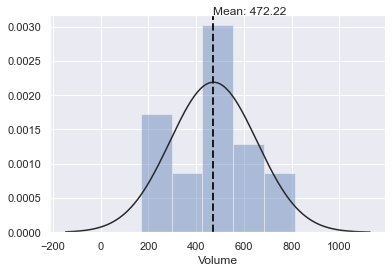

In [10]:
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

sns.set_theme()

plt.figure()
ax = sns.distplot(cDf1002['Volume'], fit=norm, kde=False)

plt.axvline(cDf1002['Volume'].mean(), color='k', linestyle='dashed', linewidth=2)
low, hi = plt.ylim()

meanv = cDf1002['Volume'].mean()
plt.text(meanv, hi, f'Mean: {meanv:.2f}')

Text(607.3214285714286, 0.0017891373801916933, 'Mean: 607.32')

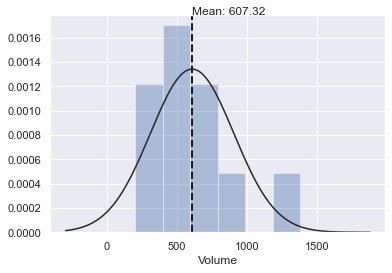

In [14]:

plt.figure()
ax = sns.distplot(pDf1002['Volume'], fit=norm, kde=False)

pMeanV = pDf1002['Volume'].mean()

plt.axvline(pMeanV, color='k', linestyle='--', linewidth=2)
low, hi = plt.ylim()

plt.text(pMeanV, hi, f'Mean: {pMeanV:.2f}')

In [17]:
# T-TEST

from scipy.stats import ttest_ind

stat, p = ttest_ind(pDf1002['Volume'], cDf1002['Volume'])

print(f'Statistics: {stat:.3f} && p: {p:.3f}')

Statistics: 1.634 && p: 0.111
